
# APPM 4600 Hw. 7
## Kevin Stull
### Problem 1:

Uses library for V instead of derivation because I missed the lab where we derived it.

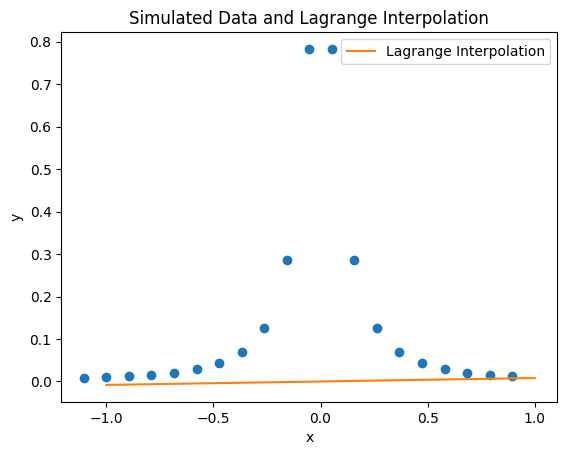

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.polynomial import poly1d

# f(x)
def f(x):
    return 1 / (1 + (10 * x)**2)

# calculates interpolation polynomial
def interpolate(x_s, y_s):

  # uses library b/c I missed lab where we did this
  V = np.vander(x_s, increasing=True)

  V_inv = np.linalg.inv(V)
  poly = np.transpose(y_s) @ V_inv
  return np.array(poly)

# evaluates interpolation polynomial at x value
def poly_eval(poly, x):
  result =  0
  for i in range(len(poly)):
    result += poly[i] * x
  return result

# Define the range and number of points for plotting
N_val = 20
x_range = np.linspace(-1, 1, 1001)
y_range = np.zeros(1001)
x_s = [] # simulated data x values
y_s = [] # simulated data y values
h = 2 / (N_val - 1)

# use formula to x get points
for i in range(N_val):
  x_s.append(-1 + (i-1)*h)
x_s = np.array(x_s)

# use formula to y get points
for i in range(N_val):
  y_s.append(f(x_s[i]))
y_s = np.array(y_s)

# calculate polnomial coefficients
poly = interpolate(x_s, y_s)

# calulate interpolation values
for i in range(1001):
  y_range[i] = poly_eval(poly, x_range[i])

# generate plot
plt.plot(x_s, y_s, 'o')
plt.plot(x_range, y_range, label='Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Simulated Data and Lagrange Interpolation')
plt.show()


### Problem 2


<ipython-input-50-f0744c5841bb>:28: RuntimeWarning: divide by zero encountered in double_scalars
  s += (w(j, x_s) / (x - x_s[j])) * y_s[j]
<ipython-input-50-f0744c5841bb>:29: RuntimeWarning: invalid value encountered in double_scalars
  return p*s


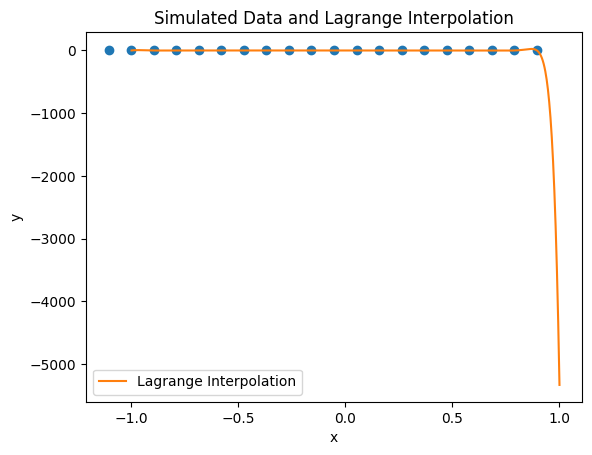

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.polynomial import poly1d

# f(x)
def f(x):
    return 1 / (1 + (10 * x)**2)

# calculates interpolation polynomial
def interpolate(x_s, y_s):
  V = np.vander(x_s, increasing=True)
  V_inv = np.linalg.inv(V)
  poly = np.transpose(y_s) @ V_inv
  return np.array(poly)

# evaluates interpolation polynomial at x value
def bary_eval(x_s, y_s, x):

  '''
  x_s : vector of x data
  y_s : vector of y data
  x : the scalar x value to be interpolated
  '''
  p = phi(x, x_s)
  s = 0.0
  for j in range(len(x_s)):
    s += (w(j, x_s) / (x - x_s[j])) * y_s[j]
  return p*s

def w(j, x_s):
  result = 1.0
  for i in range(len(x_s)):
    if i != j:
      result *= 1 / (x_s[j] - x_s[i])
  return result

def phi(x, x_s):
  result = 1.0
  for i in range(len(x_s)):
    result *= (x - x_s[i])
  return result

# Define the range and number of points for plotting
N_val = 20
interp_range = 1001
x_range = np.linspace(-1, 1, interp_range)
y_range = np.zeros(interp_range)
x_s = [] # simulated data x values
y_s = [] # simulated data y values
h = 2 / (N_val - 1)

# use formula to x get points
for i in range(N_val):
  x_s.append(-1 + (i-1)*h)
x_s = np.array(x_s)

# use formula to y get points
for i in range(N_val):
  y_s.append(f(x_s[i]))
y_s = np.array(y_s)

# calulate interpolation values
for i in range(interp_range):
  y_range[i] = bary_eval(x_s, y_s, x_range[i])

# generate plot
plt.plot(x_s, y_s, 'o')
plt.plot(x_range, y_range, label='Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Simulated Data and Lagrange Interpolation')
plt.show()


Result converges but I believe that something is rotten in Denmark. This code will probably need another look at a later date.

### Problem 3


In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.polynomial import poly1d

# f(x)
def f(x):
    return 1 / (1 + (10 * x)**2)

# calculates interpolation polynomial
def interpolate(x_s, y_s):
  V = np.vander(x_s, increasing=True)
  V_inv = np.linalg.inv(V)
  poly = np.transpose(y_s) @ V_inv
  return np.array(poly)

# evaluates interpolation polynomial at x value
def poly_eval(poly, x):
  result =  0
  for i in range(len(poly)):
    result += poly[i] * x
  return result

# Define the range and number of points for plotting
N_val = 20
x_range = np.linspace(-1, 1, 1001)
y_range = np.zeros(1001)
x_s = [] # simulated data x values
y_s = [] # simulated data y values

# use formula to x get points
for i in range(N_val):
  x_s.append((np.cos(2*i - 1)*np.pi)/(2*N_val))
x_s = np.array(x_s)

# use formula to y get points
for i in range(N_val):
  y_s.append(f(x_s[i]))
y_s = np.array(y_s)

# calculate polnomial coefficients
poly = interpolate(x_s, y_s)

# calulate interpolation values
for i in range(1001):
  y_range[i] = poly_eval(poly, x_range[i])

# generate plot
plt.plot(x_s, y_s, 'o')
plt.plot(x_range, y_range, label='Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Simulated Data and Lagrange Interpolation')
plt.show()


[ 0.04243524  0.04243524 -0.07775383  0.02227878  0.05921134 -0.07156
  0.00034759  0.0712707  -0.05966575 -0.02161128  0.07765268 -0.04301856
 -0.04184861  0.07784889 -0.02294453 -0.0587523   0.0718437  -0.00104275
 -0.07097582  0.06011548]


LinAlgError: ignored

For some reason when I generate the $x_j$ I get a singular matrix. So I guess you could say my interpolation is failing now.

<ipython-input-51-55065396b702>:35: RuntimeWarning: divide by zero encountered in double_scalars
  result *= 1 / (x_s[j] - x_s[i])


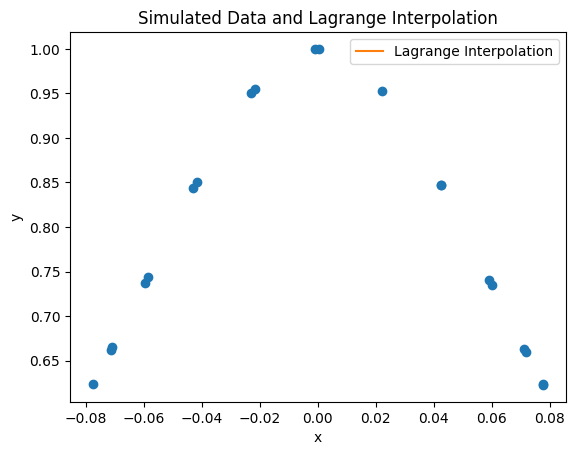

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.polynomial import poly1d

# f(x)
def f(x):
    return 1 / (1 + (10 * x)**2)

# calculates interpolation polynomial
def interpolate(x_s, y_s):
  V = np.vander(x_s, increasing=True)
  V_inv = np.linalg.inv(V)
  poly = np.transpose(y_s) @ V_inv
  return np.array(poly)

# evaluates interpolation polynomial at x value
def bary_eval(x_s, y_s, x):

  '''
  x_s : vector of x data
  y_s : vector of y data
  x : the scalar x value to be interpolated
  '''
  p = phi(x, x_s)
  s = 0.0
  for j in range(len(x_s)):
    s += (w(j, x_s) / (x - x_s[j])) * y_s[j]
  return p*s

def w(j, x_s):
  result = 1.0
  for i in range(len(x_s)):
    if i != j:
      result *= 1 / (x_s[j] - x_s[i])
  return result

def phi(x, x_s):
  result = 1.0
  for i in range(len(x_s)):
    result *= (x - x_s[i])
  return result

# Define the range and number of points for plotting
N_val = 20
interp_range = 1001
x_range = np.linspace(-1, 1, interp_range)
y_range = np.zeros(interp_range)
x_s = [] # simulated data x values
y_s = [] # simulated data y values
h = 2 / (N_val - 1)

# use formula to x get points
for i in range(N_val):
  x_s.append((np.cos(2*i - 1)*np.pi)/(2*N_val))
x_s = np.array(x_s)

# use formula to y get points
for i in range(N_val):
  y_s.append(f(x_s[i]))
y_s = np.array(y_s)

# calulate interpolation values
for i in range(interp_range):
  y_range[i] = bary_eval(x_s, y_s, x_range[i])

# generate plot
plt.plot(x_s, y_s, 'o')
plt.plot(x_range, y_range, label='Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Simulated Data and Lagrange Interpolation')
plt.show()


When I use this technique with the Barycentric technique I do not get a singular matrix, which is pretty nice.